In [1]:
from typing import Annotated, List, Literal, TypedDict
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [20]:
class State(TypedDict):
    nlist: Annotated[list[str], operator.concat]


In [15]:
def nodeA(state: State) -> State:
    print(f"received state in nodeA: {state}")
    return State(nlist=["A"])

def nodeB(state: State) -> State:
    print(f"received state in nodeB: {state}")
    return State(nlist=["B"])

def nodeC(state: State) -> State:
    print(f"received state in nodeC: {state}")
    return State(nlist=["C"])

def nodeBb(state: State) -> State:
    print(f"received state in nodeBb: {state}")
    return State(nlist=["Bb"])

def nodeCc(state: State) -> State:
    print(f"received state in nodeCc: {state}")
    return State(nlist=["Cc"])

def nodeD(state: State) -> State:
    print(f"received state in nodeD: {state}")
    return State(nlist=["D"])

def nodeE(state: State) -> State:
    print(f"received state in nodeE: {state}")
    return State(nlist=["E"])


In [17]:
builder = StateGraph(State)
builder.add_node("nodeA", nodeA)

builder.add_node("nodeB", nodeB)
builder.add_node("nodeC", nodeC)
builder.add_node("nodeE", nodeE)
builder.add_node("nodeBb", nodeBb)
builder.add_node("nodeCc", nodeCc)
builder.add_node("nodeD", nodeD)

builder.add_edge(START, "nodeA")
builder.add_edge("nodeA", "nodeB")
builder.add_edge("nodeA", "nodeC")
builder.add_edge("nodeA", "nodeE")
builder.add_edge("nodeB", "nodeBb")
builder.add_edge("nodeC", "nodeCc")
builder.add_edge("nodeE", "nodeD")
builder.add_edge("nodeBb", END)
builder.add_edge("nodeCc", END)
builder.add_edge("nodeD", END)

graph = builder.compile()


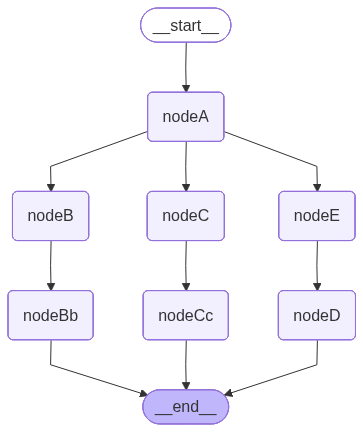

In [18]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
init_state = State(nlist=[])
graph.invoke(init_state)

received state in nodeA: {'nlist': []}
received state in nodeB: {'nlist': ['A']}
received state in nodeC: {'nlist': ['A']}
received state in nodeE: {'nlist': ['A']}
received state in nodeCc: {'nlist': ['A', 'B', 'C', 'E']}
received state in nodeBb: {'nlist': ['A', 'B', 'C', 'E']}
received state in nodeD: {'nlist': ['A', 'B', 'C', 'E']}


{'nlist': ['A', 'B', 'C', 'E', 'Bb', 'Cc', 'D']}